In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier       #Imports

In [2]:
filename = '/content/cancer.csv'        #Load Data
df = pd.read_csv(filename)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.drop(columns='id', inplace = True)     #Drop ID column because it is a unique value

In [4]:
df['diagnosis'].value_counts(normalize = True)    #Check class names and 

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [5]:
df['diagnosis'].replace({'B': 0, 'M': 1})     #Convert strings to numeric values

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [6]:
y = df['diagnosis']         #X and y split
X = df.drop(columns = 'diagnosis')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)      #Train test split

Decision Tree Classifer

In [8]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [9]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
dec_tree.predict(X_test)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [11]:
dec_train_score = dec_tree.score(X_train, y_train)
dec_test_score = dec_tree.score(X_test, y_test)
print(f'Decision Tree Training Score: {dec_train_score}')
print(f'Decision Tree Testing Score: {dec_test_score}')

Decision Tree Training Score: 1.0
Decision Tree Testing Score: 0.951048951048951


In [12]:
dec_tree.get_depth()

7

In [13]:
dec_depth_range = list(range(2, 8))        #for loop for depth range
r2 = []
for depth in dec_depth_range:
    dec_tree_2 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dec_tree_2.fit(X_train, y_train)
    score = dec_tree_2.score(X_test, y_test)
    r2.append(score)

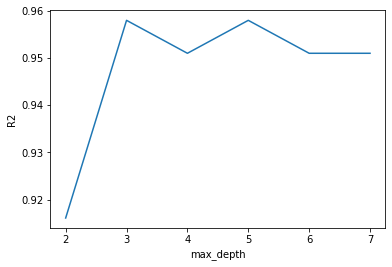

In [15]:
import matplotlib.pyplot as plt       #3 is the best depth
plt.plot(dec_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [16]:
dec_tree_3 = DecisionTreeClassifier(random_state=42, max_depth = 3)

In [17]:
dec_tree_3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
dec_tree_3.predict(X_test)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [21]:
dec_train_score_3 = dec_tree_3.score(X_train, y_train)
dec_test_score_3 = dec_tree_3.score(X_test, y_test)
print(f'Decision Tree Training Score: {dec_train_score_3}')
print(f'Decision Tree Testing Score: {dec_test_score_3}')

Decision Tree Training Score: 0.971830985915493
Decision Tree Testing Score: 0.958041958041958


Bagging Classifier

In [22]:
bagreg = BaggingClassifier(random_state=42)

In [24]:
bagreg.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [25]:
bagreg.predict(X_test)

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [26]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(f'Bagging Classifier Training Score: {bagreg_train_score}')
print(f'Bagging Claffier Testing Score: {bagreg_test_score}')

Bagging Classifier Training Score: 0.9929577464788732
Bagging Claffier Testing Score: 0.951048951048951


In [37]:
n_est = [30, 35, 40, 45, 50]     #n estimators list
br_scores = pd.DataFrame(index=n_est, columns=['Test score', 'Train score'])      #DF to hold results
for n in n_est:           
  model = BaggingClassifier(random_state=42, n_estimators=n)         #for loop to loop through estimators
  model.fit(X_train, y_train)
  br_scores.loc[n, 'Train score'] = model.score(X_train, y_train)
  br_scores.loc[n, 'Test score'] = model.score(X_test, y_test)

br_scores 

,Test score,Train score
30,0.958042,1.0
35,0.958042,0.997653
40,0.958042,0.997653
45,0.958042,1.0
50,0.958042,1.0


In [38]:
bagreg_2 = BaggingClassifier(n_estimators=35, random_state=42) 

In [39]:
bagreg_2.fit(X_train, y_train) 

BaggingClassifier(n_estimators=35, random_state=42)

In [40]:
bagreg_train_score_2 = bagreg_2.score(X_train, y_train)       #evaluate and print
bagreg_test_score_2 = bagreg_2.score(X_test, y_test)
print(f'Bagged Tree Train Score: {bagreg_train_score_2}')
print(f'Bagged Tree Test Score: {bagreg_test_score_2}')

Bagged Tree Train Score: 0.9976525821596244
Bagged Tree Test Score: 0.958041958041958
